In [45]:
import pandas as pd
import json
import matplotlib.pyplot as plt

from igraph import *

In [2]:
df = pd.read_csv("characters.csv", header=0)

In [20]:
df.iloc[0:10]

,character,Ant-Man,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Black Panther,Captain America: Civil War,Captain America: The First Avenger,Captain America: The Winter Soldier,Captain Marvel,...,Spider-Man: Homecoming,The Avengers,Thor,Thor: Ragnarok,Thor: The Dark World,total lines,total words,movie appearances,avg words per line,avg lines per movie
0,TONY STARK,0,173,137,119,0,165,0,0,0,...,74,152,0,0,0,1788,22590,9,12,198
1,STEVE ROGERS,3,133,119,25,0,154,186,218,3,...,7,121,0,0,0,977,8653,10,8,97
2,THOR,0,55,70,74,0,0,0,0,0,...,0,47,166,289,133,863,9487,7,10,123
3,PETER PARKER,0,0,7,39,0,73,0,0,0,...,402,0,0,0,0,551,5517,4,10,137
4,NATASHA ROMANOFF,1,79,69,15,0,64,0,112,3,...,0,97,0,1,0,498,4689,10,9,49
5,PEPPER POTTS,0,0,15,21,0,0,0,0,0,...,7,29,0,0,0,442,3492,7,7,63
6,BRUCE BANNER,0,83,93,45,0,0,0,0,2,...,0,84,0,62,0,379,3840,7,10,54
7,NICK FURY,0,26,0,7,0,0,5,68,120,...,0,109,0,0,0,366,4524,7,12,52
8,LOKI,0,0,1,6,0,0,0,0,0,...,0,68,91,74,76,327,4097,6,12,54
9,SCOTT LANG,222,0,70,0,0,22,0,0,0,...,0,0,0,0,0,324,3236,3,9,108


In [15]:
def select_columns(df, movies):
    columns = ["character"] + [movies]
    df = df[columns].loc[df[columns][movies] != 0]
    return df

def select_character(df, characters):
    df = df.loc[df["character"].isin(characters)]
    return df

In [77]:
for column in df.columns.difference(['character', 'movie appearances', 'avg lines per movie', 'avg words per line', 'total lines', 'total words']):
    character = df[["character", column]].sort_values(by=[column], ascending=False).iloc[0]["character"]
    movie = column
    print("\ncharacter: ", character)
    print("movie: ", movie)
    top5 = df[["character", column]].sort_values(by=[column], ascending=False).iloc[1:10]["character"].to_list()
    print("top 5: ", top5)


character:  SCOTT LANG
movie:  Ant-Man
top 5:  ['HANK PYM', 'HOPE VAN DYNE', 'LUIS', 'DARREN CROSS', 'JAMES "JIM" PAXTON', 'DAVE', 'KURT', 'CASSIE LANG', 'MAGGIE LANG']

character:  TONY STARK
movie:  Avengers: Age of Ultron
top 5:  ['STEVE ROGERS', 'BRUCE BANNER', 'ULTRON', 'NATASHA ROMANOFF', 'CLINT BARTON', 'THOR', 'WANDA MAXIMOFF', 'NICK FURY', 'MARIA HILL']

character:  TONY STARK
movie:  Avengers: Endgame
top 5:  ['STEVE ROGERS', 'BRUCE BANNER', 'THOR', 'SCOTT LANG', 'NATASHA ROMANOFF', 'ROCKET', 'CLINT BARTON', 'JAMES RHODES', 'THANOS']

character:  TONY STARK
movie:  Avengers: Infinity War
top 5:  ['PETER QUILL', 'THOR', 'THANOS', 'STEPHEN STRANGE', 'ROCKET', 'BRUCE BANNER', 'GAMORA', 'PETER PARKER', 'WANDA MAXIMOFF']

character:  T'CHALLA
movie:  Black Panther
top 5:  ['SHURI', 'NAKIA', 'EVERETT ROSS', 'OKOYE', "N'JADAKA (KILLMONGER)", 'ULYSSES KLAUE', 'ZURI', 'RAMONDA', "M'BAKU"]

character:  TONY STARK
movie:  Captain America: Civil War
top 5:  ['STEVE ROGERS', 'PETER PARKE

In [19]:
select_character(df, ["TONY STARK", "PETER PARKER"])

,character,Ant-Man,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Black Panther,Captain America: Civil War,Captain America: The First Avenger,Captain America: The Winter Soldier,Captain Marvel,...,Spider-Man: Homecoming,The Avengers,Thor,Thor: Ragnarok,Thor: The Dark World,total lines,total words,movie appearances,avg words per line,avg lines per movie
0,TONY STARK,0,173,137,119,0,165,0,0,0,...,74,152,0,0,0,1788,22590,9,12,198
3,PETER PARKER,0,0,7,39,0,73,0,0,0,...,402,0,0,0,0,551,5517,4,10,137


In [7]:
select_columns(df, "Avengers: Infinity War")

,character,Avengers: Infinity War
0,TONY STARK,119
1,STEVE ROGERS,25
2,THOR,74
3,PETER PARKER,39
4,NATASHA ROMANOFF,15
5,PEPPER POTTS,21
6,BRUCE BANNER,45
7,NICK FURY,7
8,LOKI,6
10,JAMES RHODES,17


In [48]:
df[['character','avg lines per movie']]['character'].iloc[0:10]

0          TONY STARK
1        STEVE ROGERS
2                THOR
3        PETER PARKER
4    NATASHA ROMANOFF
5        PEPPER POTTS
6        BRUCE BANNER
7           NICK FURY
8                LOKI
9          SCOTT LANG
Name: character, dtype: object

In [4]:
colunas = df[['character', 'Avengers: Infinity War']]
df = df.filter(items=colunas)
filmes = colunas.columns.difference(['character'])
df = df[(df[filmes] != 0).any(axis=1)]
personagens = df['character'].loc[~(df==0).all(axis=1)]
numero_personagens = personagens.count()
numero_filmes = len(filmes)
numero_nos = numero_personagens + numero_filmes
# filmes

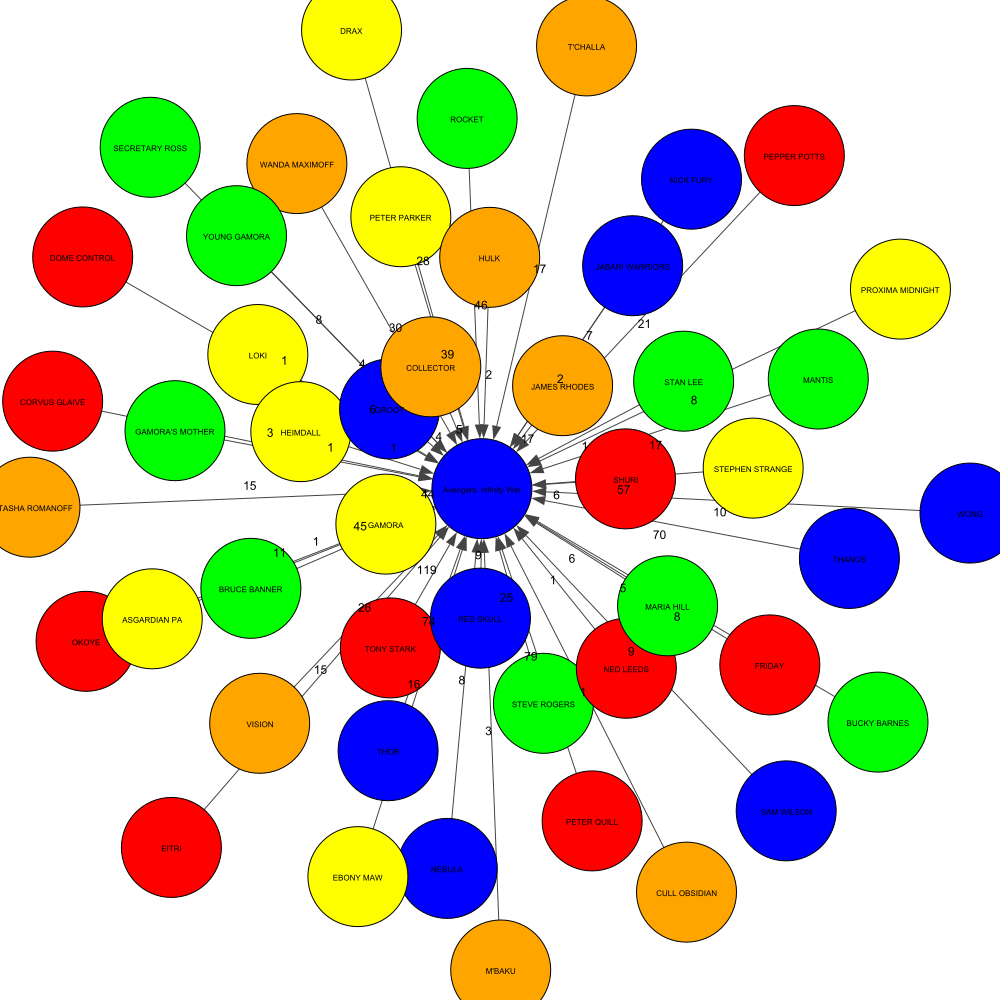

In [6]:
g = Graph(directed=True)

g.add_vertices(numero_nos)

i = 0
for personagem in personagens:
    g.vs[i]["id"]= personagem
    g.vs[i]["label"]= personagem   
    i+=1

for filme in filmes:
    g.vs[i]["id"]= filme
    g.vs[i]["label"]= filme   
    i+=1

        
g.vs['id']

edges = []
weights = []
index_personagem = 0
for (i, row) in df.iterrows():
    j = 0
    for column in filmes:
        if row[column] > 0:
            relation = (index_personagem, numero_personagens + j)
            edges.append(relation)
            weights.append(row[column])
        j += 1
    index_personagem+=1

edges
g.add_edges(edges)
g.es['weight'] = weights
g.es['label'] = weights



visual_style = {}
out_name = "graph.png"
# Set bbox and margin
visual_style["bbox"] = (1000,1000)
visual_style["margin"] = 30
# Set vertex colours
visual_style["vertex_color"]  = ["red", "green", "blue", "yellow", "orange"]
# Set vertex size
visual_style["vertex_size"] = 100
# Set vertex lable size
visual_style["vertex_label_size"] = 8
# Don't curve the edges
visual_style["edge_curved"] = False
# Set the layout
my_layout = g.layout_lgl()
visual_style["layout"] = my_layout
# Plot the graph
plot(g, out_name, **visual_style)

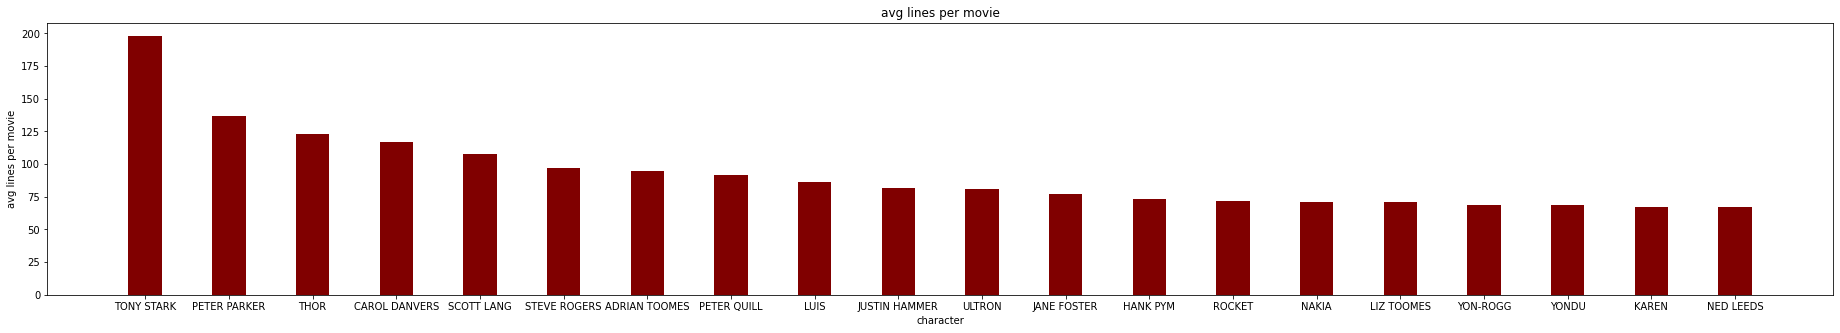

In [72]:
plt.bar(df[['character','avg lines per movie']].sort_values(by='avg lines per movie', ascending=False)['character'].iloc[0:20], df[['character','avg lines per movie']].sort_values(by='avg lines per movie', ascending=False)['avg lines per movie'].iloc[0:20].values, color ='maroon',
        width = 0.4)

plt.rcParams["figure.figsize"] = (32,5)
plt.xlabel("character")
plt.ylabel('avg lines per movie')
plt.title('avg lines per movie')
plt.show()